In [19]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ML/updated/ApexSpi_HistoricalPrices - ApexSpi_HistoricalPrices.csv')

In [20]:
df

,Date,Open,High,Low,Close,Volume
0,1997-07-08,16.60,16.60,16.60,16.60,399.999996
1,1997-07-17,19.00,19.00,19.00,19.00,2199.999978
2,1997-07-21,18.50,18.50,18.50,18.50,5199.999948
3,1997-07-22,18.57,18.57,18.57,18.57,2999.999970
4,1997-07-28,19.00,19.00,19.00,19.00,3999.999960
...,...,...,...,...,...,...
4157,2022-08-04,140.90,141.00,136.20,137.20,52458.000000
4158,2022-08-08,135.40,138.00,135.10,135.70,29619.000000
4159,2022-08-10,135.70,143.90,135.70,140.00,112135.000000
4160,2022-08-11,138.50,140.20,136.60,138.30,25455.000000


In [21]:
df = df[['Date', 'Close']]
df.head(10)

,Date,Close
0,1997-07-08,16.60
1,1997-07-17,19.00
2,1997-07-21,18.50
3,1997-07-22,18.57
4,1997-07-28,19.00
5,1997-07-31,18.50
6,1997-08-05,19.02
7,1997-08-06,18.76
8,1997-08-11,17.47
9,1997-08-13,17.00


In [22]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1998-08-23')
datetime_object

datetime.datetime(1998, 8, 23, 0, 0)

In [23]:
df['Date'] = df['Date'].apply(str_to_datetime)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df['Date']

0      1997-07-08
1      1997-07-17
2      1997-07-21
3      1997-07-22
4      1997-07-28
          ...    
4157   2022-08-04
4158   2022-08-08
4159   2022-08-10
4160   2022-08-11
4161   2022-08-16
Name: Date, Length: 4162, dtype: datetime64[ns]

In [25]:
df.index = df.pop('Date')

In [26]:
df.index

DatetimeIndex(['1997-07-08', '1997-07-17', '1997-07-21', '1997-07-22',
               '1997-07-28', '1997-07-31', '1997-08-05', '1997-08-06',
               '1997-08-11', '1997-08-13',
               ...
               '2022-07-27', '2022-07-28', '2022-08-01', '2022-08-02',
               '2022-08-03', '2022-08-04', '2022-08-08', '2022-08-10',
               '2022-08-11', '2022-08-16'],
              dtype='datetime64[ns]', name='Date', length=4162, freq=None)

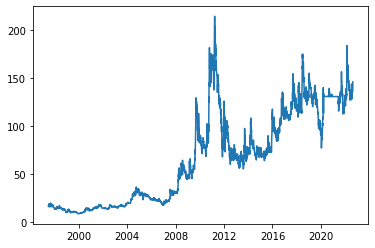

In [27]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [28]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  #print(target_date)
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+2)
    #print(df_subset)
    
    if len(df_subset) != n+2:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=100)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n+1):
    X[:, i]
    ret_df[f'Target-{n+1-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df



In [29]:
# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '1998-08-23', 
                                '2022-08-11',                         
                                n=5)
windowed_df

,Target Date,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,1998-08-23,14.61,14.81,14.70,14.75,15.10,14.88,13.80
1,1998-08-26,14.70,14.75,15.10,14.88,13.80,13.60,13.35
2,1998-08-27,14.75,15.10,14.88,13.80,13.60,13.35,13.70
3,1998-09-01,15.10,14.88,13.80,13.60,13.35,13.70,13.60
4,1998-09-02,14.88,13.80,13.60,13.35,13.70,13.60,13.80
...,...,...,...,...,...,...,...,...
4041,2022-08-03,133.70,131.60,130.20,128.30,133.40,144.30,139.80
4042,2022-08-04,131.60,130.20,128.30,133.40,144.30,139.80,137.20
4043,2022-08-08,130.20,128.30,133.40,144.30,139.80,137.20,135.70
4044,2022-08-10,128.30,133.40,144.30,139.80,137.20,135.70,140.00


In [30]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((4046,), (4046, 6, 1), (4046,))

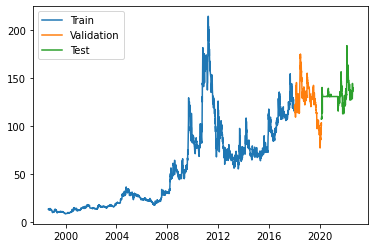

In [31]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90,]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((6, 1)),
                    layers.LSTM(128),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

# model.compile(
#     optimizer=Adam(learning_rate=0.001),
#     loss='mse',
#     metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [33]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
102/102 [==============================] - 4s 19ms/step - loss: 1811.1471 - mean_absolute_error: 25.0063 - val_loss: 14.7818 - val_mean_absolute_error: 2.8813
Epoch 2/100
102/102 [==============================] - 1s 13ms/step - loss: 10.5261 - mean_absolute_error: 1.9875 - val_loss: 38.8845 - val_mean_absolute_error: 5.2086
Epoch 3/100
102/102 [==============================] - 2s 16ms/step - loss: 10.0422 - mean_absolute_error: 1.9212 - val_loss: 75.5123 - val_mean_absolute_error: 7.9214
Epoch 4/100
102/102 [==============================] - 2s 16ms/step - loss: 9.1597 - mean_absolute_error: 1.8171 - val_loss: 46.1873 - val_mean_absolute_error: 6.0545
Epoch 5/100
102/102 [==============================] - 1s 11ms/step - loss: 10.6116 - mean_absolute_error: 2.0457 - val_loss: 13.3591 - val_mean_absolute_error: 2.5812
Epoch 6/100
102/102 [==============================] - 1s 10ms/step - loss: 13.0491 - mean_absolute_error: 2.3036 - val_loss: 23.0264 - val_mean_absolute_erro

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                

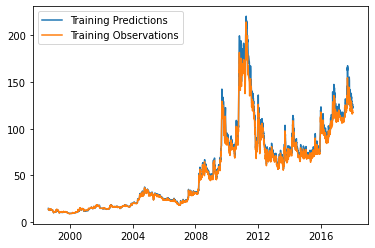

In [35]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [36]:
results = model.evaluate(X_train, y_train)

102/102 [==============================] - 0s 4ms/step - loss: 22.2382 - mean_absolute_error: 2.8448


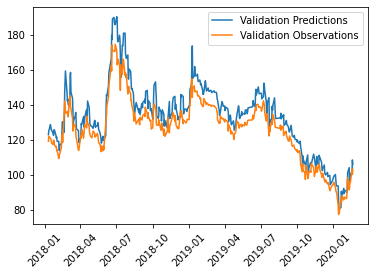

In [37]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.xticks(rotation = 45)
plt.legend(['Validation Predictions', 'Validation Observations'])

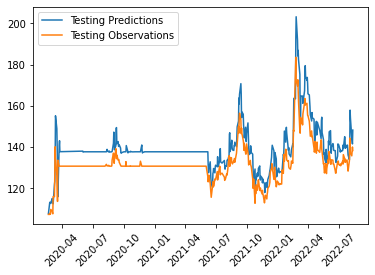

In [38]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.xticks(rotation = 45)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [39]:
results = model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 4ms/step - loss: 74.2627 - mean_absolute_error: 7.6686


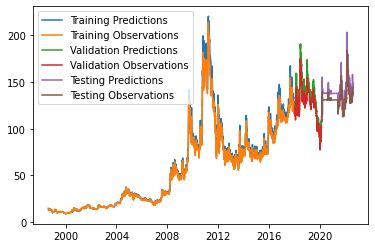

In [40]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])